In [1]:
#### %matplotlib inline
import numpy as np
import os
import sys 
from sys import exit
import pandas as pd

import matplotlib as mpl
nice_fonts = {
"font.family": "Arial", ## Cos helvetica isnt supported by pdf backend!
}

# nice_fonts = {
# "font.family": "Helvetica-Bold", ## only for saving as tiff
# }
mpl.rcParams.update(nice_fonts)
import matplotlib.pyplot as plt
# Disable printing
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore printing
def enablePrint():
    sys.stdout = sys.__stdout__
def matlab_to_matplotlib_units(x):
    return (x/72.)
    '''
    https://www.mathworks.com/help/matlab/ref/matlab.ui.figure-properties.html#buiwuyk-1_sep_shared-Units
    pixels.
    Starting in R2015b, distances in pixels are independent of your system resolution on Windows and Macintosh systems:
    On Windows systems, a pixel is 1/96th of an inch.
    On Macintosh systems, a pixel is 1/72nd of an inch.
    On Linux systems, the size of a pixel is determined by your system resolution
    '''
# mycolor = [0 0.4470 0.7410;
#  0.8500 0.3250 0.0980;
#  0.9290 0.6940 0.1250;
#  0.4940 0.1840 0.5560;
#  0.4660 0.6740 0.1880;
#  0.3010 0.7450 0.9330;
#  0.6350 0.0780 0.1840];
matlab_blue=[0, 0.4470, 0.7410]

fontSize=12
sfontSize=9
def create_color_cycler(n, left=[0, 0.6, 1], right=[1, 0.1, 0]): ## these default values from keisuke's fig1
    assert n>1
    color_array=np.zeros((n,3))
    color_array[:,0]=np.linspace(left[0],right[0],n)
    color_array[:,1]=np.linspace(left[1],right[1],n)
    color_array[:,2]=np.linspace(left[2],right[2],n)
    return color_array





# The velocity jump for two species with death rates

The function are written assuming the +state is 1 and moves faster and dies, the -state is 2 and nucleates. But they can be used for the other case as well if values are passed correctly.

In [2]:

def vel1(v1,v2,r1,r2,f1,f2):
    V=(   (np.sqrt( f1*f2*(r2*(f1 - r1) + f2*r1)   )*(v2*(f1 - r1) + f2*v1 - 
    r2*v1))*np.sign( (f1 + f2 - r1 - r2)*(v1 - v2)  ) + (r2*(f1 - r1) + f2*r1)*(v2*(f1 - r1) - f2*v1 +
     r2*v1)  )/(  ((f1 + f2 - r1 - r2)*np.sqrt( f1*f2*(r2*(f1 - r1) + f2*r1)  ) )* 
    np.sign( (f1 + f2 - r1 - r2)*(v1 - v2) ) + (f1 - f2 - r1 + r2)*(r2*(f1 - r1) + f2*r1) )
    return V
def vel2(v1,v2,r1,r2,f1,f2):
    V=-( ((   np.sqrt( f1*f2*(r2*(f1 - r1) + f2*r1)  )*(f1*v2 + f2*v1 - r1*v2 - 
          r2*v1))* np.sign((f1 + f2 - r1 - r2)*(v1 - v2) ) + (r2*(f1 - r1) + f2*r1)*
           (-(f1*v2) + f2*v1 + r1*v2 
            - r2*v1))/ (((-f1 - f2 + r1 + r2)*  np.sqrt( f1*f2*(r2*(f1 - r1) + f2*r1)  ) )* 
        np.sign((f1 + f2 - r1 - r2)*(v1 - v2) ) + (f1 - f2 - r1 + r2)* (r2*(f1 - r1) + f2*r1)))
    return V
    
def calc_rCrit(d1, f1, f2):    ### if Fsum>rpp+rmm, then solution might not exist for all fR
    rCrit = d1*f2/(d1+f1)
    return rCrit

def calc_Jeff(v1,v2,r1,r2,f1,f2): ## calculates Jeff
    Jeff=((r1 - f1)*v2 + (r2 - f2)*v1)/ (r1 - f1 + r2 - f2)
    return Jeff

def calc_J(v1,v2,f1,f2): ## calculates J, the mean velocity in polymer case
    J=( f1*v2 + f2*v1)/ ( f1 + f2)
    return J

def calc_f2_at_zeroJ(v1,v2,f1): ## calculates J, the mean velocity in polymer case
    f2_at_zeroJ=-v2*f1/v1
    return f2_at_zeroJ


def calc_Jstar_at_r2Crit(v1,v2,r1,f1,f2): ## calculates Jeff at r2=rCrit, therefore not a function of r2
    r2star=calc_rCrit(-1*r1, f1, f2)
    Jstar=calc_Jeff(v1,v2,r1,r2star,f1,f2)    
    Jstar_analytical= ( v2*(r1-f1)**2 + f2*f1*v1 )/ ( (r1-f1)**2 + f2*f1   )
    assert Jstar_analytical==Jstar, "otherwise check calculation"
    return Jstar_analytical

def calc_f2_at_zeroJstar(v1,v2,r1,f1): ## Calculates f2 when Jstar=0 ( Jeff at r2Crit=0, i.e, velocity jump is 0)    
    f2_at_zeroJstar=-v2*(r1-f1)**2 /( f1*v1)
    return f2_at_zeroJstar
 
def calc_r1_at_zeroJstar(v1,v2,f1, f2): ## Calculates r1 when Jstar=0 ( Jeff at r2Crit=0, i.e, velocity jump is 0)    
    r1_at_zeroJstar=f1- np.sqrt(- f1*f2*v1/v2)
    return r1_at_zeroJstar
    

## Figure paper 2 panel different d with nucleating plus state, dying minus state

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


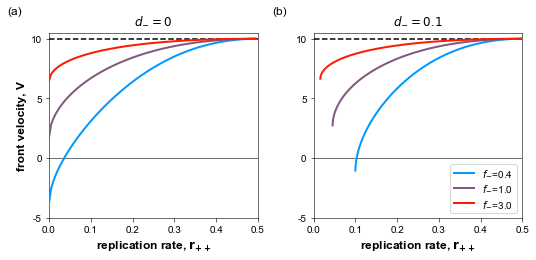

In [4]:
### nucleating plus state is 2, dying minus state is 1
# destfolder='/Users/ashish/Dropbox/research/Levy walks with growth Keisuke Ryan/Figures/Jump_2species/'
# if not os.path.exists(destfolder): os.makedirs(destfolder)    


# hfont = {'fontname':'Helvetica'}
    
v1=-15.
v2=10.
f2=.5
f1ToPlot_array=np.array([0.4, 1., 3.] ) 
f1InLegend=['0.4', '1.0','3.0']  

r1_panelB=-0.1


#### r2 varies between 0 and r2_max
r2_max=f2 #r2_max=f1+f2-0.01

nlines=len(f1ToPlot_array)
color_array=create_color_cycler(nlines)



fig = plt.figure(figsize=(7.5,3.75)) 
ax1 = fig.add_subplot(1,2,1) 
r1=0.0
for idx, f1 in enumerate(f1ToPlot_array):
    rCrit=calc_rCrit(-1*r1, f1, f2)
    J_ax1=calc_J(v1,v2,f1,f2)
    r2=np.linspace(rCrit+1e-5,r2_max,100)  
    velocity1=vel1(v1,v2,r1,r2,f1,f2)
    velocity2=vel2(v1,v2,r1,r2,f1,f2)
    ax1.plot(r2, np.maximum(velocity1,velocity2)  ,color=color_array[idx],
             linewidth=2,zorder=2*idx+3)

vcrit=np.maximum( vel1(v1,v2,r1,rCrit+1e-5,f1,f2),vel2(v1,v2,r1,rCrit+1e-5,f1,f2) )
    
ax2 = fig.add_subplot(1,2,2) 
r1=r1_panelB
for idx, f1 in enumerate(f1ToPlot_array):
    rCrit=calc_rCrit(-1*r1, f1, f2)
    J_ax2=calc_J(v1,v2,f1,f2)
    r2=np.linspace(rCrit+1e-5,r2_max,1000)  
    velocity1=vel1(v1,v2,r1,r2,f1,f2)
    velocity2=vel2(v1,v2,r1,r2,f1,f2)
#     ax2.plot(r2,np.clip( np.maximum(velocity1,velocity2),0,None ),color=color_array[idx],linewidth=2,zorder=2*idx+4, label=r'$f_{-}$='+f1InLegend[idx] ) 
    ax2.plot(r2,np.maximum(velocity1,velocity2),color=color_array[idx],
             linewidth=2,zorder=2*idx+4, label=r'$f_{-}$='+f1InLegend[idx] ) 


    
yticks=[-5,0,5,10]
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.set_ylim(-5,10.5)
ax1.set_xlim(0.0,r2_max)
ax1.set_ylabel(r'front velocity, V',fontweight="bold",fontsize=fontSize)
ax1.set_xlabel(r'replication rate, $\mathbf{r_{++}}$',fontweight="bold",fontsize=fontSize) 
ax1.set_title(r'$d_{-}=0$',fontsize=fontSize,pad=10 )
ax1.hlines(v2,0,r2_max,'k',linestyle='--') 
ax1.hlines(0,0,r2_max,color='black', alpha=.75,linewidth=0.75) 


ax2.set_ylim(-5.,10.5)
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticks)
ax2.set_xlim(0.0,r2_max)
# ax2.set_ylabel(r'front velocity, V',fontweight="bold",fontsize=fontSize)
ax2.set_xlabel(r'replication rate, $\mathbf{r_{++}}$',fontweight="bold",fontsize=fontSize) 
ax2.set_title(r'$d_{-}=0.1$',fontsize=fontSize, pad=10 )
ax2.hlines(v2,0,r2_max,'k',linestyle='--') 
ax2.hlines(0,0,r2_max,color='black', alpha=.75,linewidth=0.75) 
   
### we want the plot boundaries to be below the data, so we give them a smaller zorder  
ax2.set_zorder(1)
ax1.set_zorder(1)

####### we need the subplot boundaries to be a little thinner, like matlab
####https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
for ax, color in zip([ax1, ax2], ['black', 'black']):
    plt.setp(ax.spines.values(),  alpha=.75, color=color,linewidth=0.75)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color, alpha=.75,linewidth=0.75)


ax1.text(-0.2,1.1,'(a)',transform=ax1.transAxes,fontsize=fontSize)
ax2.text(-0.2,1.1,'(b)',transform=ax2.transAxes,fontsize=fontSize)
ax2.legend(loc=4)

plt.tight_layout()
# plt.savefig(destfolder+"Fig_death_rates.pdf")
# plt.savefig(destfolder+"Fig_death_rates.png",dpi=300)
# plt.show()

## Figure for the paper 3 panel with nucleating minus state, dying plus state


f2_JstarZero is  [0.5    0.8712]
f2_zeroJ is  0.5
middle J is 0.09900990099009865
-0.0
0.07272727272727272


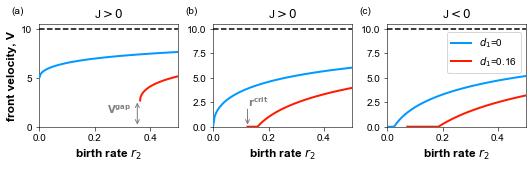

In [5]:
### in the polymer case the + state moves faster and nucleates
### Here the +state moves faster and DIES, the minus state nucleates
### plus state is 1, minus state is 2
# destfolder='/Users/ashish/Dropbox/research/Levy walks with growth Keisuke Ryan/Figures/Jump_2species/'
# if not os.path.exists(destfolder): os.makedirs(destfolder)    

    
r1ToPlot_array=np.array([0,-0.16] ) 
d1InLegend=['0','0.16']  
v1=10.
v2=-10.
f1=0.5
f2_JstarZero=calc_f2_at_zeroJstar(v1,v2,r1ToPlot_array,f1)
print ("f2_JstarZero is ", f2_JstarZero)
f2_zeroJ=calc_f2_at_zeroJ(v1,v2,f1)
print ("f2_zeroJ is ", f2_zeroJ)
f2_JveryPositive=1.5 ## positive J at higher f2
f2_JPositive=0.51
f2_JVeryNegative=0.3

assert f2_JPositive>f2_zeroJ
assert f2_JVeryNegative<f2_zeroJ
assert f2_JveryPositive>f2_zeroJ


#### r2 varies between 0 and r2_max
r2_max=f1 #r2_max=f1+f2-0.01

nlines=len(r1ToPlot_array)
color_array=create_color_cycler(nlines)




fig = plt.figure(figsize=(7.5,2.5)) 
ax1 = fig.add_subplot(1,3,1) 

f2=f2_JveryPositive
for idx, r1 in enumerate(r1ToPlot_array):
    rCrit=calc_rCrit(-1*r1, f1, f2)
    J_ax1=calc_J(v1,v2,f1,f2)
    r2=np.linspace(rCrit+1e-5,r2_max,100)  
    velocity1=vel1(v1,v2,r1,r2,f1,f2)
    velocity2=vel2(v1,v2,r1,r2,f1,f2)
    ax1.plot(r2, np.clip( np.maximum(velocity1,velocity2),0,None )  ,color=color_array[idx],
             linewidth=2,zorder=2*idx+3)

vcrit=np.maximum( vel1(v1,v2,r1,rCrit+1e-5,f1,f2),vel2(v1,v2,r1,rCrit+1e-5,f1,f2) )
    
## assuming the last r1 is the one we want to annotate    
ax1.annotate(s='', xy=(rCrit-0.01,0.), xytext=(rCrit-0.01,vcrit), arrowprops=dict(arrowstyle='<->',color='grey'))    
ax1.text(rCrit-0.03, vcrit/2, r'$\mathbf{V^{gap}}$', horizontalalignment='right',weight='bold',color='grey')    

    
    
ax2 = fig.add_subplot(1,3,2) 
f2=f2_JPositive
print ("middle J is",calc_J(v1,v2,f1,f2) )
for idx, r1 in enumerate(r1ToPlot_array):
    rCrit=calc_rCrit(-1*r1, f1, f2)
    J_ax2=calc_J(v1,v2,f1,f2)
    r2=np.linspace(rCrit+1e-5,r2_max,100)  
    velocity1=vel1(v1,v2,r1,r2,f1,f2)
    velocity2=vel2(v1,v2,r1,r2,f1,f2)
    ax2.plot(r2,np.clip( np.maximum(velocity1,velocity2),0,None ),color=color_array[idx],
             linewidth=2,zorder=2*idx+4 ) 

ax2.annotate(s='', xy=(rCrit,0.), xytext=(rCrit,2.), arrowprops=dict(arrowstyle='->',color='grey'))    
ax2.text(rCrit, 2.1, r'$\mathbf{r^{crit}}$', horizontalalignment='left',weight='bold',color='grey')    

    
    
    
ax3 = fig.add_subplot(1,3,3) 
f2=f2_JVeryNegative
for idx, r1 in enumerate(r1ToPlot_array):
    rCrit=calc_rCrit(-1*r1, f1, f2)
    print (rCrit)
    J_ax3=calc_J(v1,v2,f1,f2)
    r2=np.linspace(rCrit+1e-5,r2_max,100)  
    velocity1=vel1(v1,v2,r1,r2,f1,f2)
    velocity2=vel2(v1,v2,r1,r2,f1,f2)
    ax3.plot(r2,np.clip( np.maximum(velocity1,velocity2),0,None ),color=color_array[idx],
             linewidth=2, zorder=2*idx+5, label=r'$d_1$='+d1InLegend[idx] ) 

    


yticks=[0,5,10]
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks)
ax1.set_ylim(0.0,10.5)
ax1.set_xlim(0.0,r2_max)
ax1.set_ylabel(r'front velocity, V',fontweight="bold",fontsize=fontSize)
ax1.set_xlabel(r'birth rate $r_2$',fontweight="bold",fontsize=fontSize) 
ax1.set_title(r'J$>0$' )
ax1.hlines(v1,0,r2_max,'k',linestyle='--') 


ax2.set_ylim(0.0,10.5)
ax2.set_xlim(0.0,r2_max)
# ax2.set_ylabel(r'front velocity, V',fontweight="bold",fontsize=fontSize)
ax2.set_xlabel(r'birth rate $r_2$',fontweight="bold",fontsize=fontSize) 
ax2.set_title(r'J$>0$'  )
ax2.hlines(v1,0,r2_max,'k',linestyle='--') 


ax3.set_ylim(0.0,10.5)
ax3.set_xlim(0.0,r2_max)
# ax3.set_ylabel(r'front velocity, V',fontweight="bold",fontsize=fontSize)
ax3.set_xlabel(r'birth rate $r_2$',fontweight="bold",fontsize=fontSize) 
ax3.set_title(r'J$<0$')
ax3.hlines(v1,0,r2_max,'k',linestyle='--')  
ax3.legend(loc='upper right', bbox_to_anchor=(1., .97))
   
    
### we want the plot boundaries to be below the data, so we give them a smaller zorder  
ax3.set_zorder(1)
ax2.set_zorder(1)
ax1.set_zorder(1)

####### we need the subplot boundaries to be a little thinner, like matlab
####https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
for ax, color in zip([ax1, ax2, ax3], ['black', 'black', 'black']):
    plt.setp(ax.spines.values(),  alpha=.75, color=color,linewidth=0.75)
    plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color, alpha=.75,linewidth=0.75)




ax1.text(-0.2,1.1,'(a)',transform=ax1.transAxes)
ax2.text(-0.2,1.1,'(b)',transform=ax2.transAxes)
ax3.text(-0.2,1.1,'(c)',transform=ax3.transAxes)


plt.tight_layout()
# plt.savefig(destfolder+"Fig_death_rates_dyingPlus.pdf")
plt.show()